# Basics

In [2]:
!pip install -q  langchain langgraph langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00


In [3]:
from langchain_groq import ChatGroq

In [89]:
from google.colab import userdata
apikey = userdata.get('GROQ_API_KEY')

In [90]:
llm = ChatGroq(model= 'llama-3.3-70b-versatile', temperature = 0, api_key=apikey)

In [91]:
llm.invoke('what is ai?')

AIMessage(content='Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that would typically require human intelligence, such as:\n\n1. **Learning**: AI systems can learn from data, experiences, and interactions, enabling them to improve their performance over time.\n2. **Problem-solving**: AI systems can analyze problems, identify patterns, and make decisions or recommendations based on that analysis.\n3. **Reasoning**: AI systems can draw inferences, make logical connections, and arrive at conclusions based on available data.\n4. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.\n\nThe primary goals of AI are to:\n\n1. **Mimic human intelligence**: Create systems that can think, learn, and behave like humans.\n2. **Augment human capabilities**: Develop systems that can assist humans in various tasks, making them more efficient and effective.\n3. **Automate tasks**: Create systems t

In [21]:
from langchain_core.messages import HumanMessage , AIMessage

# create a list
messages = [
    HumanMessage(content='Hi?', name='Student'),
    AIMessage(content='Hi! How can I help you today?', name='AI'),
    HumanMessage(content='what is meant by AI?', name='Student'),
    AIMessage(content='Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that would typically require human intelligence', name='AI'),
    HumanMessage('How can I learn')
]

llm.invoke(messages)

AIMessage(content='There are many ways to learn about Artificial Intelligence (AI). Here are some suggestions:\n\n1. **Online Courses**: Websites like Coursera, edX, and Udemy offer a wide range of AI courses, from beginner to advanced levels.\n2. **Books**: There are many books on AI, including "Artificial Intelligence: A Modern Approach" by Stuart Russell and Peter Norvig, and "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.\n3. **Tutorials and Guides**: Websites like TensorFlow, PyTorch, and Keras provide tutorials and guides on how to get started with AI and machine learning.\n4. **YouTube Channels**: Channels like 3Blue1Brown, Machine Learning Mastery, and Siraj Raval offer video tutorials and explanations on AI and machine learning concepts.\n5. **Practice with Projects**: Start with simple projects, such as building a chatbot or image classifier, to gain hands-on experience with AI.\n6. **Join Online Communities**: Participate in online forums like Kaggle, 

# LangGraph

## 1.Simple Graph

### State

In [22]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
  prompt : str

In [23]:
sgd_state : LearningState = LearningState(prompt='Hello, Zeeshan from UOL')

In [30]:
print(sgd_state)
print(sgd_state['prompt'] + ' I am Pakistani ')

{'prompt': 'Hello, Zeeshan from UOL'}
Hello, Zeeshan from UOL I am Pakistani 


In [31]:
print(sgd_state['prompt']+ ' Sargodha Campus')

Hello, Zeeshan from UOL Sargodha Campus


### Nodes


In [32]:
def node_1(state: LearningState) -> LearningState:
  print('---Node 1---  ', state)
  return {'prompt' : state['prompt'] + 'I am '}

def node_2(state: LearningState) -> LearningState:
  print('--- Node 2--- ', state)
  return {'prompt': state['prompt'] + ' Pakistani'}

### Edge

Edges connect the nodes.


### Graph Construction

In [33]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

builder : StateGraph = StateGraph(state_schema = LearningState)

In [34]:
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


In [35]:
# Nodes
builder.add_node('node_1', node_1)
builder.add_node('node_2', node_2)

In [37]:
# Simples Edges Logic
builder.add_edge(START, 'node_1')
builder.add_edge('node_1','node_2')
builder.add_edge('node_2', END)

# Add
graph: CompiledStateGraph = builder.compile()

In [38]:
print(graph)

In [40]:
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])


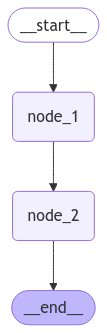

In [41]:
#view
display(Image(graph.get_graph().draw_mermaid_png()))

### Graph Invocation


In [45]:
graph.invoke({'prompt': 'Hello,how are you '})

---Node 1---   {'prompt': 'Hello,how are you '}
--- Node 2---  {'prompt': 'Hello,how are you I am '}


{'prompt': 'Hello,how are you I am  Pakistani'}

## 2.Conditional Graph

In [64]:
from typing_extensions import TypedDict

class State(TypedDict):
  graph_state: str

### Node

In [65]:
def node1(state:State) -> State:
  print('---Node 1',state)
  return {'graph_state': state['graph_state'] + 'I am '}

def node2(state:State) -> State:
  print('Node 2', state)
  return {'graph_state': state['graph_state'] + 'happy!'}

def node3(state:State) -> State:
  print('Node 3', state)
  return {'graph_state' : state['graph_state'] + 'sad'}

### Edges


In [69]:
import random
from typing import Literal

def decision_node(state) -> Literal['node2', 'node3']:
  user_input = state['graph_state']

  if random.random() < 0.5:
    return 'node2'

  return 'node3'

### Graph Construction


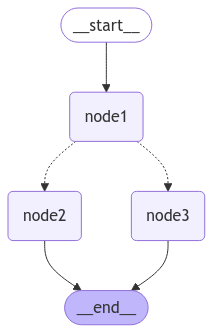

In [70]:
from IPython.display import Image, display
from langgraph.graph import StateGraph , START, END

#build
builder = StateGraph(State)
builder.add_node('node1', node1)
builder.add_node('node2', node2)
builder.add_node('node3', node3)

#add decision node
builder.add_edge(START, 'node1')
builder.add_conditional_edges('node1', decision_node)
builder.add_edge('node2', END)
builder.add_edge('node3', END)

#add
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [78]:
graph.invoke({"graph_state": "Hey, I am Zeeshan."})

---Node 1 {'graph_state': 'Hey, I am Zeeshan.'}
Node 2 {'graph_state': 'Hey, I am Zeeshan.I am '}


{'graph_state': 'Hey, I am Zeeshan.I am happy!'}

## 3.LLM Graph

In [79]:
from typing_extensions import TypedDict

class LLMState(TypedDict):
  prompt : str
  output : str

### Node

In [80]:
def llm_node(state: LLMState):
  print('Node1', state)
  prompt = state['prompt']
  ai_msg: AIMessage = llm.invoke(prompt)
  return {'output': ai_msg.content}

In [82]:
greet_message = llm_node(LLMState(prompt = 'hello, i am zeeshan'))
print(greet_message)

Node1 {'prompt': 'hello, i am zeeshan'}
{'output': "Hello Zeeshan! It's nice to meet you. Is there something I can help you with or would you like to chat?"}


### Graph Build

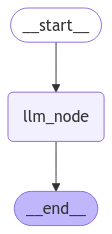

In [84]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START , END
from langgraph.graph.state import CompiledStateGraph

# build
builder = StateGraph(LLMState)
builder.add_node('llm_node', llm_node)

# add
builder.add_edge(START, 'llm_node')
builder.add_edge('llm_node', END)

#compile
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

### Invoke

In [85]:
result = graph.invoke({'prompt': 'what is ai?'})

Node1 {'prompt': 'what is ai?'}


In [86]:
result

{'prompt': 'what is ai?',
 'output': 'Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that would typically require human intelligence, such as:\n\n1. **Learning**: AI systems can learn from data, experiences, and interactions, enabling them to improve their performance over time.\n2. **Problem-solving**: AI systems can analyze problems, identify patterns, and make decisions or recommendations based on that analysis.\n3. **Reasoning**: AI systems can draw inferences, make logical connections, and arrive at conclusions based on available data.\n4. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.\n\nThe primary goals of AI are to:\n\n1. **Mimic human intelligence**: Create systems that can think, learn, and behave like humans.\n2. **Augment human capabilities**: Develop systems that can assist humans in various tasks, making them more efficient and effective.\n3. **Automate tasks*

In [87]:
# just another helpter function
import textwrap
from IPython.display import display, Markdown

def to_markdown(text)-> Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [88]:
print("PROMPT: ", result['prompt'])
to_markdown(result['output'])

PROMPT:  what is ai?


> Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that would typically require human intelligence, such as:
> 
> 1. **Learning**: AI systems can learn from data, experiences, and interactions, enabling them to improve their performance over time.
> 2. **Problem-solving**: AI systems can analyze problems, identify patterns, and make decisions or recommendations based on that analysis.
> 3. **Reasoning**: AI systems can draw inferences, make logical connections, and arrive at conclusions based on available data.
> 4. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.
> 
> The primary goals of AI are to:
> 
> 1. **Mimic human intelligence**: Create systems that can think, learn, and behave like humans.
> 2. **Augment human capabilities**: Develop systems that can assist humans in various tasks, making them more efficient and effective.
> 3. **Automate tasks**: Create systems that can perform tasks autonomously, without human intervention.
> 
> AI has many applications across various industries, including:
> 
> 1. **Virtual assistants** (e.g., Siri, Alexa)
> 2. **Image and speech recognition** (e.g., facial recognition, voice assistants)
> 3. **Natural Language Processing** (e.g., chatbots, language translation)
> 4. **Predictive analytics** (e.g., forecasting, recommendation systems)
> 5. **Robotics** (e.g., autonomous vehicles, industrial robots)
> 6. **Healthcare** (e.g., medical diagnosis, personalized medicine)
> 7. **Finance** (e.g., trading, risk management)
> 
> There are several types of AI, including:
> 
> 1. **Narrow or Weak AI**: Designed to perform a specific task, such as image recognition or language translation.
> 2. **General or Strong AI**: Aims to create a system that can perform any intellectual task that a human can.
> 3. **Superintelligence**: A hypothetical AI system that is significantly more intelligent than the best human minds.
> 
> As AI continues to evolve, it has the potential to transform many aspects of our lives, from how we work and communicate to how we live and interact with the world around us.